In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet('../data/series_train.parquet')
df.head()

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT,id
0,0,0.021536,0.022214,-1.022370,0.022853,-88.280762,0.0,53.000000,4188.000000,56940000000000,4,3,41.0,00115b9f
1,1,0.022005,0.022187,-1.019740,0.020231,-88.241707,0.0,51.666668,4188.166504,56945000000000,4,3,41.0,00115b9f
2,2,0.022240,0.022005,-1.019401,0.019893,-88.170067,0.0,50.333332,4188.333496,56950000000000,4,3,41.0,00115b9f
3,3,0.021589,0.022578,-1.018177,0.018667,-88.250031,0.0,50.500000,4188.500000,56955000000000,4,3,41.0,00115b9f
4,4,0.022005,0.023763,-1.014323,0.016848,-88.130775,0.0,33.166668,4181.000000,57235000000000,4,3,41.0,00115b9f


In [3]:
df['time_of_day'].min(), df['time_of_day'].max()

(np.int64(0), np.int64(86395000000000))

In [4]:
grouped = df.groupby('id')
ids = list(grouped.groups.keys())

/tmp/ipykernel_344539/292869660.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('id')


In [5]:
maxes = grouped['relative_date_PCIAT'].max(); maxes

id
00115b9f     85.0
001f3379     91.0
00f332d1     38.0
01085eb3     61.0
012cadd8      2.0
            ...  
fe9c71d8     33.0
fecc07d6     24.0
ff18b749    -13.0
ffcd4dbd     72.0
ffed1dd5    324.0
Name: relative_date_PCIAT, Length: 996, dtype: float32

In [6]:
mins = grouped['relative_date_PCIAT'].min(); mins

id
00115b9f     41.0
001f3379     68.0
00f332d1     14.0
01085eb3     39.0
012cadd8     -4.0
            ...  
fe9c71d8      8.0
fecc07d6      0.0
ff18b749    -35.0
ffcd4dbd     48.0
ffed1dd5    301.0
Name: relative_date_PCIAT, Length: 996, dtype: float32

In [7]:
lengths = maxes - mins
lengths

id
00115b9f    44.0
001f3379    23.0
00f332d1    24.0
01085eb3    22.0
012cadd8     6.0
            ... 
fe9c71d8    25.0
fecc07d6    24.0
ff18b749    22.0
ffcd4dbd    24.0
ffed1dd5    23.0
Name: relative_date_PCIAT, Length: 996, dtype: float32

<Axes: ylabel='Frequency'>

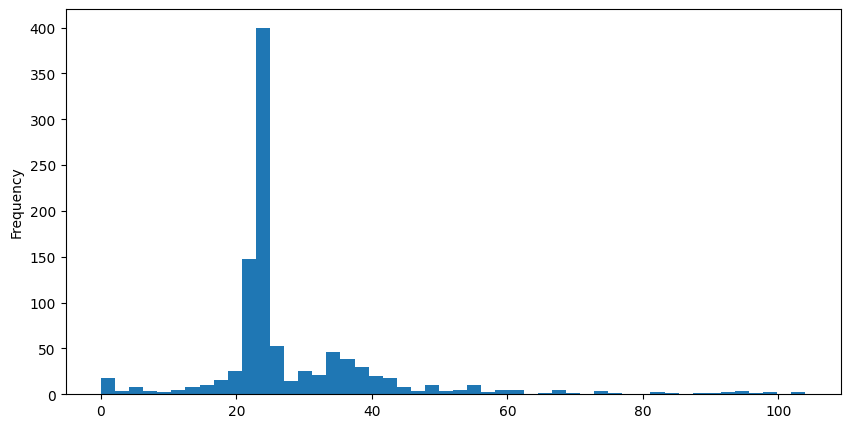

In [8]:
lengths.plot(kind='hist', figsize=(10,5), bins=50)

<Axes: ylabel='Frequency'>

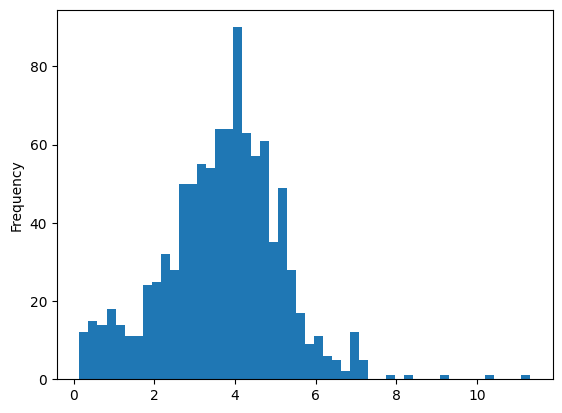

In [9]:
enmos = grouped['enmo']
mins = enmos.min()
maxs = enmos.max()
range_ = maxs - mins
range_.plot(kind='hist', bins=50)

<Axes: >

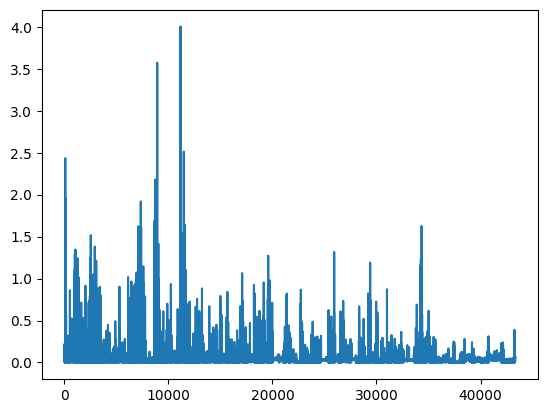

In [10]:
enmos.get_group(ids[0]).plot(kind='line')

<Axes: ylabel='Frequency'>

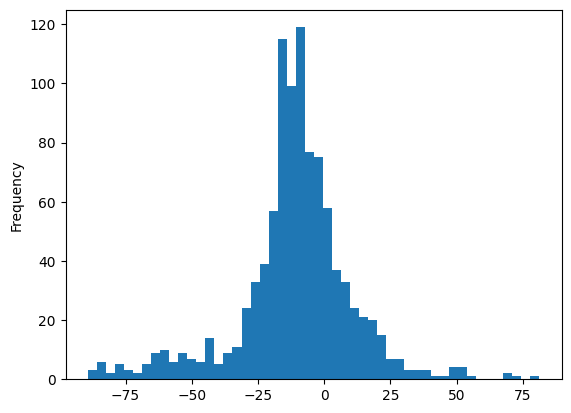

In [11]:
grouped['anglez'].mean().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

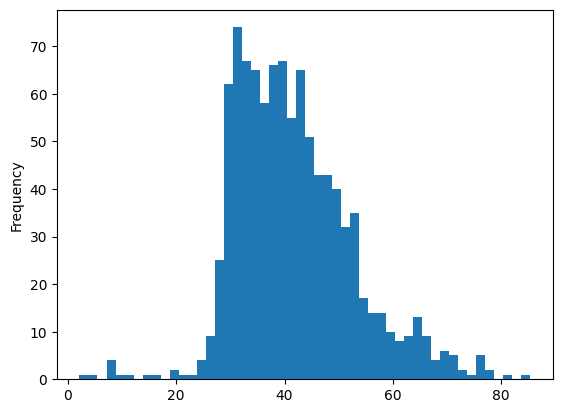

In [12]:
grouped['anglez'].std().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

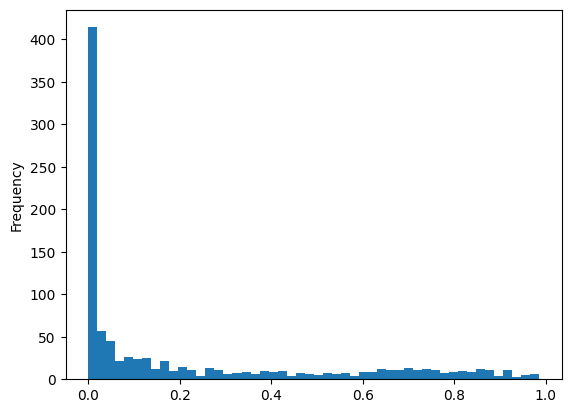

In [13]:
grouped['non-wear_flag'].mean().plot(kind='hist', bins=50)

In [14]:
(grouped['non-wear_flag'].mean() == 0).mean()

np.float64(0.3493975903614458)

this means that 34.9% (most likely) wore the device for the entire time.

<Axes: ylabel='Frequency'>

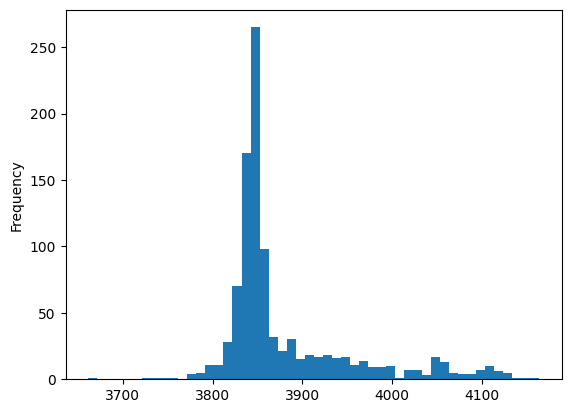

In [15]:
grouped['battery_voltage'].mean().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

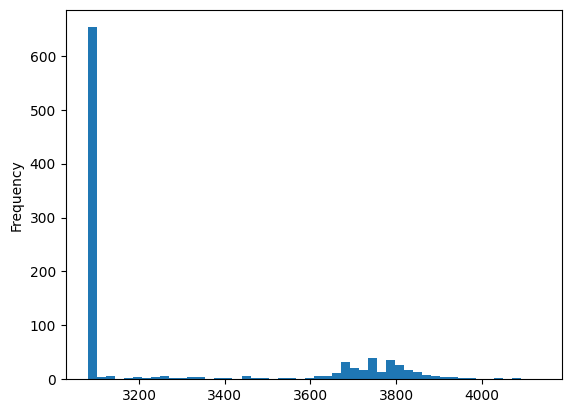

In [16]:
grouped['battery_voltage'].min().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

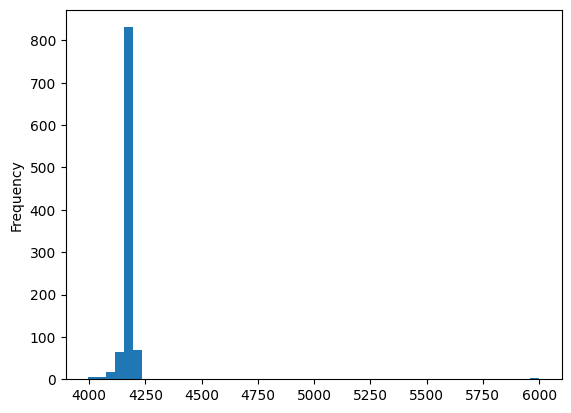

In [17]:
grouped['battery_voltage'].max().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

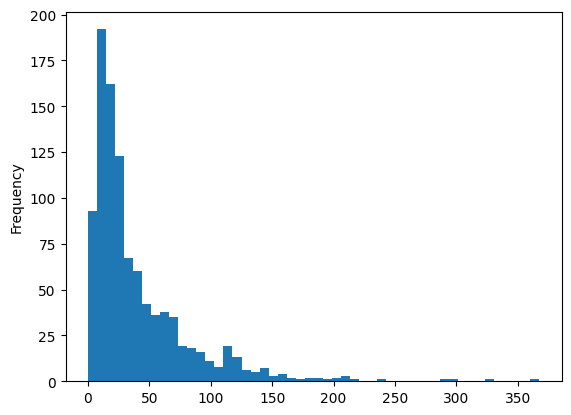

In [18]:
grouped['light'].mean().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

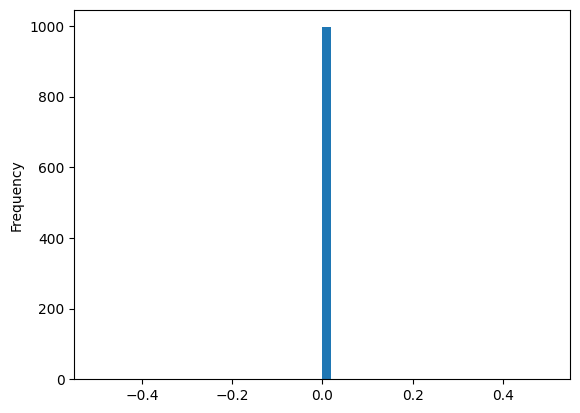

In [19]:
grouped['light'].min().plot(kind='hist', bins=50)

<Axes: ylabel='Frequency'>

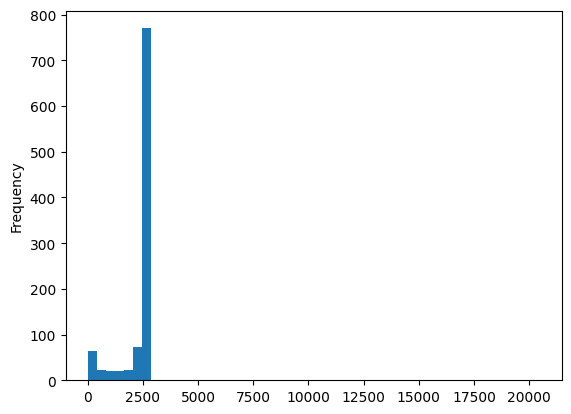

In [20]:
grouped['light'].max().plot(kind='hist', bins=50)

In [21]:
(grouped['light'].max() < 500).mean()

np.float64(0.06726907630522089)

this means 6.7% (probably) never took the device outside.

<Axes: xlabel='enmo', ylabel='non-wear_flag'>

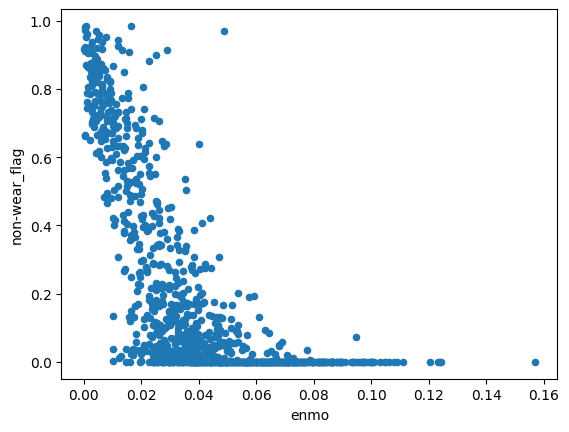

In [22]:
grouped[['enmo', 'non-wear_flag']].mean().plot(kind='scatter', x='enmo', y='non-wear_flag')